In [188]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()

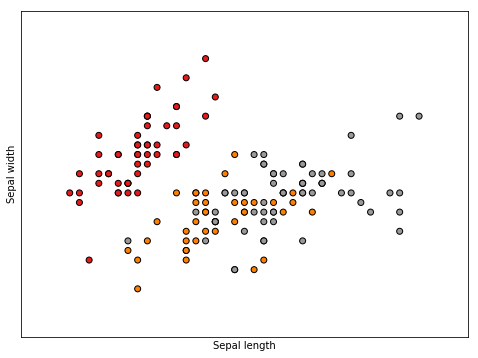

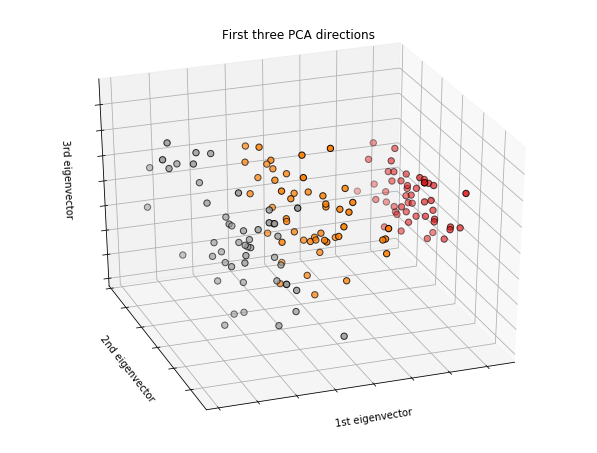

In [189]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [190]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

data = load_iris()

iris = pd.DataFrame(data= np.c_[data['data'], data['target']],columns= data['feature_names'] + ['Species'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


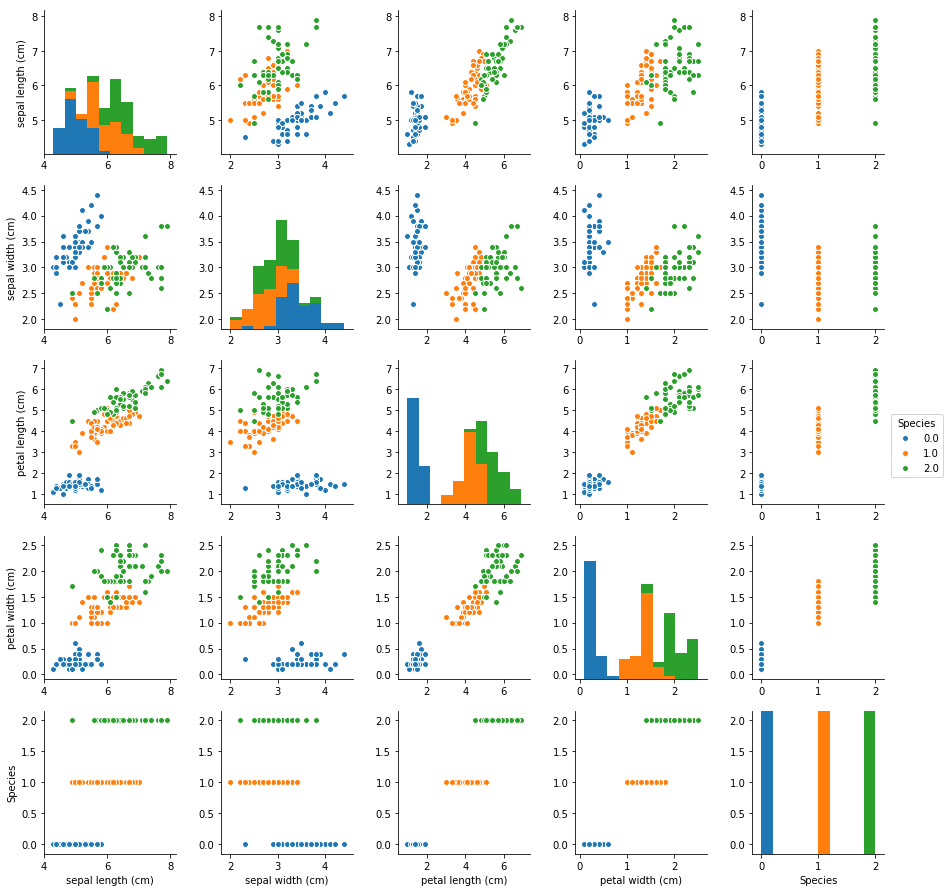

In [191]:
sns.pairplot(iris, hue="Species");
plt.show()

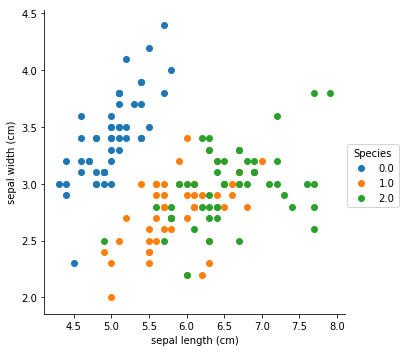

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(iris, hue="Species", size=5).map(plt.scatter, "sepal length (cm)", "sepal width (cm)").add_legend();
plt.show();

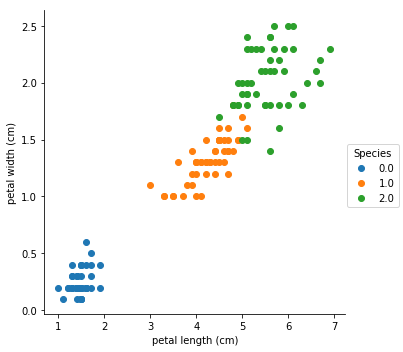

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(iris, hue="Species", size=5).map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend();
plt.show();

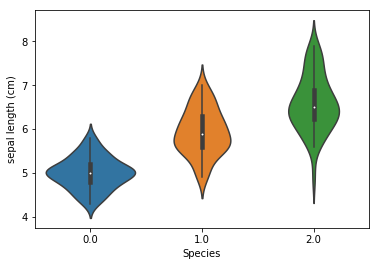

In [194]:
sns.violinplot(x="Species", y="sepal length (cm)", data=iris)
plt.show()

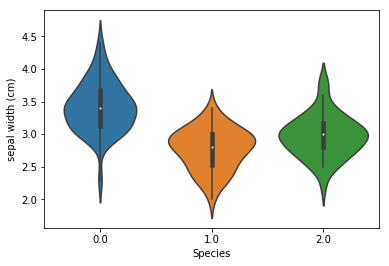

In [195]:
sns.violinplot(x="Species", y="sepal width (cm)", data=iris)
plt.show()

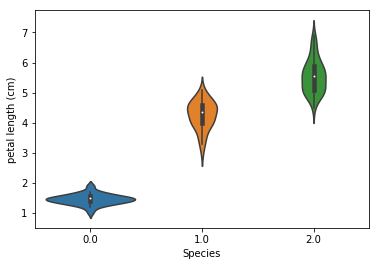

In [196]:
sns.violinplot(x="Species", y="petal length (cm)", data=iris)
plt.show()

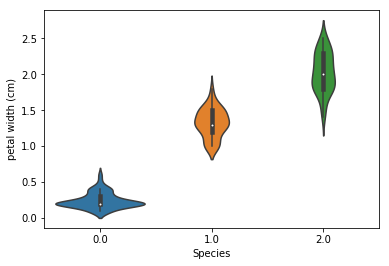

In [197]:
sns.violinplot(x="Species", y="petal width (cm)", data=iris)
plt.show()

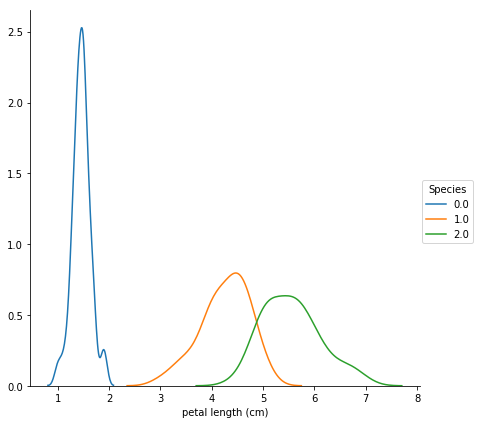

In [198]:
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "petal length (cm)") \
   .add_legend()
plt.show()

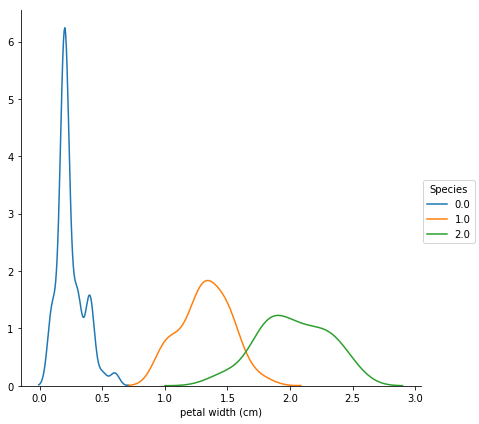

In [199]:
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "petal width (cm)") \
   .add_legend()
plt.show()

In [239]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

iris_train, iris_test = train_test_split(iris, test_size = 0.3)

x_train = iris_train[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y_train = iris_train.Species
x_test = iris_test[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y_test = iris_test.Species 

In [231]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)
metrics.accuracy_score(pred_test, y_test)

0.93333333333333335

In [232]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(x_train,y_train)
pred_test=model.predict(x_test)
metrics.accuracy_score(pred_test,y_test)

0.93333333333333335

In [233]:
from sklearn import svm

model = svm.SVC()
model.fit(x_train,y_train) 
pred_test=model.predict(x_test) 
metrics.accuracy_score(pred_test,y_test)

0.9555555555555556

In [234]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)
pred_test=model.predict(x_test)
metrics.accuracy_score(pred_test,y_test)

0.97777777777777775

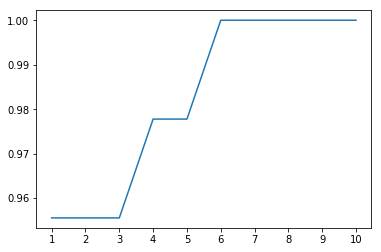

In [240]:
from sklearn.neighbors import KNeighborsClassifier

a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(x_train,y_train)
    pred_test=model.predict(x_test)
    a=a.append(pd.Series(metrics.accuracy_score(pred_test,y_test)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()

In [241]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred_test = knn.predict(x_test)
knn.score(x_test, y_test)

0.9555555555555556

In [242]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
pred_test=model.predict(x_test)
metrics.accuracy_score(pred_test,y_test)

0.9555555555555556

In [243]:
model=KNeighborsClassifier(n_neighbors=6)
model.fit(x_train,y_train)
pred_test=model.predict(x_test)
metrics.accuracy_score(pred_test,y_test)

1.0

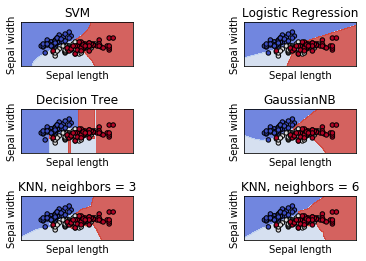

In [261]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(),
          LogisticRegression(),
          DecisionTreeClassifier(),
          GaussianNB(),
         KNeighborsClassifier(n_neighbors=3),
         KNeighborsClassifier(n_neighbors=6))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVM',
          'Logistic Regression',
          'Decision Tree',
          'GaussianNB',
         'KNN, neighbors = 3',
         'KNN, neighbors = 6')

# Set-up 3x2 grid for plotting.
fig, sub = plt.subplots(3, 2)
plt.subplots_adjust(wspace=1, hspace=1)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()